In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.cluster import KMeans

In [ ]:
!sudo pip install scikit-image

In [11]:
from PIL import Image
from scipy import ndimage

im = Image.open('/Users/alehmann/projects/colorreduction/images/study-of-a-reclining-nude-1824(1).jpg')#tumblr_mwl4csNxAR1sd8q4zo1_1280.jpg') #IMG_3756.JPG') #foto.JPG') #
ndd = np.array(im)

k = 30
decimate = 10
colors = 44
#ndd = np.concatenate([ndimage.gaussian_filter(ndd[...,x,np.newaxis],
#        np.std(ndd)/k) for x in xrange(ndd.shape[2])], axis=2)
im1 = Image.fromarray(ndd)
im1.show()

In [4]:
from scipy.cluster.vq import whiten, kmeans

# Her kan man måske med fordel benytte Poisson disc sampling http://bl.ocks.org/mbostock/dbb02448b0f93e4c82c3
im_array = ndd.reshape(ndd.shape[0]*ndd.shape[1],3)
std = np.std(im_array,0)
rnd_array = im_array[ np.random.randint(0,im_array.shape[0],len(im_array)/decimate)]


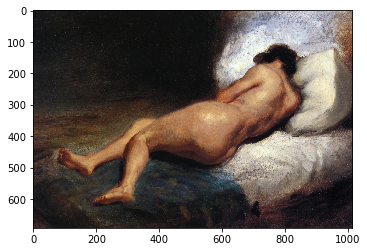

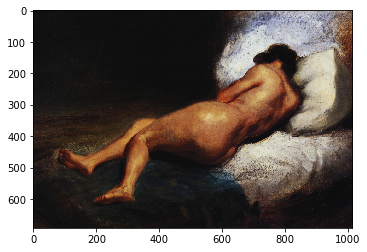

In [5]:
from sklearn.cluster import KMeans,MiniBatchKMeans
from skimage import data
from skimage.exposure import adjust_sigmoid
skim = data.imread('/Users/alehmann/projects/colorreduction/images/study-of-a-reclining-nude-1824(1).jpg')

adl_im = adjust_sigmoid(skim,150./255,5.3)#,0.15,-10,True)
#print np.min(adl_im),np.max(adl_im)
plt.imshow(skim)
figure()
plt.imshow(adl_im)

In [14]:
colors = 25


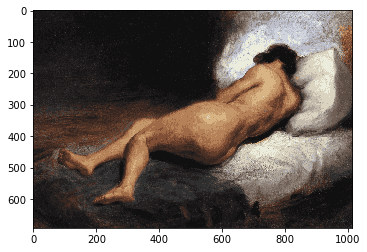

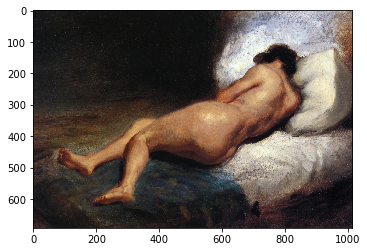

In [15]:
def reduce_colors(ndd,colors):
    model = MiniBatchKMeans(colors)
    X = ndd.reshape(ndd.shape[0]*ndd.shape[1],ndd.shape[2])
    cent = model.fit(X)
    new_im = model.cluster_centers_[model.predict(X)]
    new_im = new_im.astype('uint8')
    new_im = reshape(new_im,ndd.shape)
    
    new_X = model.transform(X)
    err = sum(np.min(np.abs(new_X),1))/X.shape[0]
    return new_im,err,model
im,err,model = reduce_colors(skim,colors)
im1,err1,model1 = reduce_colors(adl_im,colors)


plt.imshow(im)
figure()
plt.imshow(skim)

In [11]:
model.cluster_centers_

array([[  16.78368794,   16.79078014,   17.15957447],
       [ 159.75      ,  146.30952381,  134.48809524],
       [  69.03149606,   57.31496063,   52.01574803],
       [ 191.93877551,  193.37755102,  204.26530612],
       [ 154.68965517,  102.73275862,   70.6637931 ],
       [ 197.7706422 ,  153.24770642,  108.1559633 ],
       [  42.04639175,   34.33505155,   32.90463918],
       [  97.96268657,   82.08208955,   71.45522388],
       [ 238.57627119,  239.96610169,  225.15254237],
       [ 136.5212766 ,  124.85106383,  115.37234043],
       [  83.09090909,   49.97979798,   38.42424242],
       [ 226.24242424,  219.3030303 ,  196.62626263],
       [ 179.57219251,  128.87700535,   89.7486631 ],
       [ 124.95798319,   78.43697479,   53.62184874],
       [ 202.53043478,  194.56521739,  178.11304348],
       [  46.93264249,   46.97409326,   46.76165803],
       [  27.68844221,   25.22110553,   25.30820771],
       [ 219.76      ,  184.04      ,  135.04      ],
       [ 118.88596491,  104.

In [13]:
err_ = []
for colors in range(10,80,5):
    im,err,_ = reduce_colors(ndd,colors)
    err_.append(err)


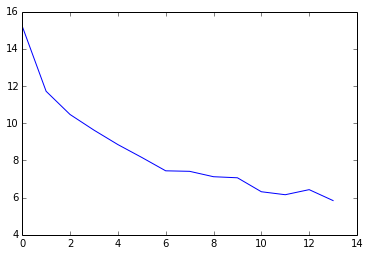

In [14]:
plot(err_)

In [40]:
q_im = Image.fromarray(im.astype(np.uint8))
q_im.show()

In [126]:
%timeit centroids = kmeans(rnd_array/std, colors)
print im_array.shape

1 loops, best of 3: 23.5 s per loop
(702380, 3)


In [113]:
centroids = centroids[0]*std
centroids

array([[ 137.14182135,   85.82791957,   57.98810905],
       [ 187.54472314,  178.62489352,  166.48944628],
       [ 156.41310361,  103.45024895,   69.49751047],
       [ 198.1733804 ,  154.11510244,  108.59496124],
       [  91.3630713 ,   67.3095064 ,   47.31736746],
       [  24.12790901,   22.31742566,   22.02971226],
       [ 216.02364711,  180.1464302 ,  132.48431105],
       [ 107.69376409,   81.8637115 ,   58.78226897],
       [  15.98834625,   16.21301968,   13.59114315],
       [  71.59946466,   41.88398832,   33.99434238],
       [  17.93682796,   17.83633513,   21.24959677],
       [  73.04198699,   88.74926079,   99.14547605],
       [  34.04457258,   27.71202747,   26.02342004],
       [  45.45375697,   40.24033795,   38.41173827],
       [ 173.1825886 ,  120.12535769,   81.19227383],
       [ 213.07546309,  206.10219911,  188.31252852],
       [  43.68769511,   31.77652544,   29.76647071],
       [  40.36383408,   44.90531303,   49.24328103],
       [  18.95072742,   18.

In [114]:

minimum_error_matrix = np.sum((ndd - centroids[0])**2,2)
#b = b.reshape(a.shape+(1,))
res = np.zeros(ndd.shape,dtype=np.uint8)+centroids[0]
for c in centroids[1:]:
    error_matrix = np.sum((ndd - c)**2,2)
    #b = np.append(b,a.reshape(a.shape+(1,)),2)
    res[error_matrix<minimum_error_matrix] = c
    minimum_error_matrix[(error_matrix<minimum_error_matrix)] = error_matrix[(error_matrix<minimum_error_matrix)]


In [115]:
im_new = Image.fromarray((res).astype(np.uint8))
im_new.show()
im_new.save('/Users/alehmann/Desktop/rye_{}_blur_{}.jpg'.format(colors,k))

In [116]:
im.show()

In [16]:
im.size

(612, 547)

In [11]:
import scipy

In [12]:
reload(scipy)
scipy

<module 'scipy' from '/Library/Python/2.7/site-packages/scipy/__init__.pyc'>

In [13]:
scipy.version.full_version


'0.14.0'

In [85]:
from sklearn.cluster import KMeans
from PIL import ImageShow
from PIL import Image
from scipy import ndimage
from scipy.cluster.vq import whiten, kmeans

def reduce_color(image,colors,blur=30, fixed=[],outdir=''):
    im = Image.open(image)
    image_array = np.array(im)

    ndd = np.concatenate([ndimage.gaussian_filter(image_array[...,x,np.newaxis],
        np.std(image_array)/blur) for x in xrange(image_array.shape[2])], axis=2)

    im1 = Image.fromarray((ndd).astype(np.uint8))
    # Her kan man måske med fordel benytte Poisson disc sampling http://bl.ocks.org/mbostock/dbb02448b0f93e4c82c3
    im_array = ndd.reshape(ndd.shape[0]*ndd.shape[1],3)
    std = np.std(im_array)
    rnd_array = im_array[ np.random.randint(0,im_array.shape[0],len(im_array)/50)]
    centroids = kmeans(rnd_array/std, colors)

    centroids = centroids[0]*std

    minimum_error_matrix = np.sum((ndd - centroids[0])**2,2)
#b = b.reshape(a.shape+(1,))
    res = np.zeros(ndd.shape,dtype=np.uint8)+centroids[0]
    for c in centroids[1:]:
        error_matrix = np.sum((image_array - c)**2,2)
        #b = np.append(b,a.reshape(a.shape+(1,)),2)
        res[error_matrix<minimum_error_matrix] = c
        minimum_error_matrix[(error_matrix<minimum_error_matrix)] = error_matrix[(error_matrix<minimum_error_matrix)]


    im_new = Image.fromarray((res).astype(np.uint8))
    #im_new.show()
    im_new.save('{}_{}_blur_{}_fixed.jpg'.format(image,colors,blur))


In [86]:
sourcedir = '/Users/alehmann/projects/colorreduction/'
for img in os.listdir(sourcedir):
    if (not 'converted' in img) and (not 'blur' in img) :
        for blur in [10,20,50]:
            for colors in [12,16,25,40]:
                reduce_color(sourcedir+img,colors, blur=blur,outdir='converted')

In [79]:
x = ndd[...,2,np.newaxis]
print x.shape,ndd.shape

(692, 1015, 1) (692, 1015, 3)


In [87]:
lo = 38
hi = 250

def f(x):
    return lo + (hi-lo)/255.*x


In [90]:
f(255)

250.0

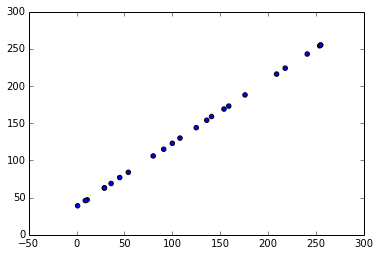

In [15]:
skeel_test = [(141,159),(254,254),(218,224),
              (80,106),(108,130),(154,169),
              (100,123),(136,154),(125,144),
              (241,243),(255,255),(11,47),
              (255,255),(209,216),(159,173),
              (176,188),(1,39),(54,84),
              (29,63),(45,77),(9,46),
              (36,69),(91,115),(29,63)]
x = [k[0] for k in skeel_test]
y = [k[1] for k in skeel_test]
scatter(x,y)